# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**РЕШЕНИЕ**

Данные центрированы, и ковариационная матрица определяется как

$$
\Sigma = \frac{1}{n} X^\top X.
$$

Пусть первые две компоненты задаются ортонормированными векторами $w_1, w_2 \in \mathbb R^p$, то есть

$$
w_1^\top w_1 = 1, \qquad
w_2^\top w_2 = 1, \qquad
w_1^\top w_2 = 0.
$$

Для каждого объекта $x_i$ вводятся координаты $z_{i1}$ и $z_{i2}$. Минимизируем функционал

$$
L = \sum_{i=1}^n \left\| x_i - z_{i1} w_1 - z_{i2} w_2 \right\|^2.
$$

Минимизируем его по $z_{ij}$ при фиксированных $w_1, w_2$. Производная по $z_{ij}$:

$$
\frac{\partial L}{\partial z_{ij}} = -2 w_j^\top x_i + 2 z_{ij} = 0.
$$

Отсюда получаем, что счёты равны проекциям:

$$
z_{ij} = w_j^\top x_i.
$$

Подставим оптимальные счёты обратно в $L$. Тогда

$$
L = \sum_{i=1}^n \left( \|x_i\|^2 - (w_1^\top x_i)^2 - (w_2^\top x_i)^2 \right).
$$

Первая сумма не зависит от $w_1, w_2$, поэтому минимизация $L$ эквивалентна максимизации

$$
\sum_{i=1}^n (w_1^\top x_i)^2 + \sum_{i=1}^n (w_2^\top x_i)^2.
$$

Используем, что

$$
\sum_{i=1}^n (w^\top x_i)^2 = n \, w^\top \Sigma w.
$$

Задача принимает вид:

$$
\max_{w_1, w_2} \quad w_1^\top \Sigma w_1 + w_2^\top \Sigma w_2,
\qquad
w_1^\top w_1 = 1,\;
w_2^\top w_2 = 1,\;
w_1^\top w_2 = 0.
$$

Сперва расссмотрим одну компоненту. Максимизируем $w^\top \Sigma w$ при условии $w^\top w = 1$. Вводим множитель Лагранжа:

$$
\mathcal{l} = w^\top \Sigma w - \lambda (w^\top w - 1).
$$

Условие стационарности:

$$
\frac{\partial \mathcal{l}}{\partial w} = 2 \Sigma w - 2 \lambda w = 0,
$$

значит

$$
\Sigma w = \lambda w.
$$

То есть оптимальный $w$ является собствнным вектором ковариационной матрицы. Значение $w^\top \Sigma w$ равно собственному числу $\lambda$.

Таким образом,

$$
w_1 \text{ — собственный вектор } \Sigma \text{ с наибольшим } \lambda_1,
$$

$$
w_2 \text{ — собственный вектор } \Sigma \text{ со вторым по величине } \lambda_2.
$$

Теперь найдём статистический смысл собственных чисел. Счёт (новая координата) определяется как

$$
z_{ij} = w_j^\top x_i.
$$

Выборочная дисперсия этих координат:

$$
\mathrm{Var}(z_j)
= \frac{1}{n} \sum_{i=1}^n (w_j^\top x_i)^2
= w_j^\top \Sigma w_j
= \lambda_j.
$$

Получается, что  первые ГК соответствуют собственным векторам ковариационной матрицы, их дисперсии равны собственным числа и $\lambda_1$ и $\lambda_2$ - две максимальные выборочные дисперсии направлений.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

In [ ]:
# вторую задачу я не сделала(((

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

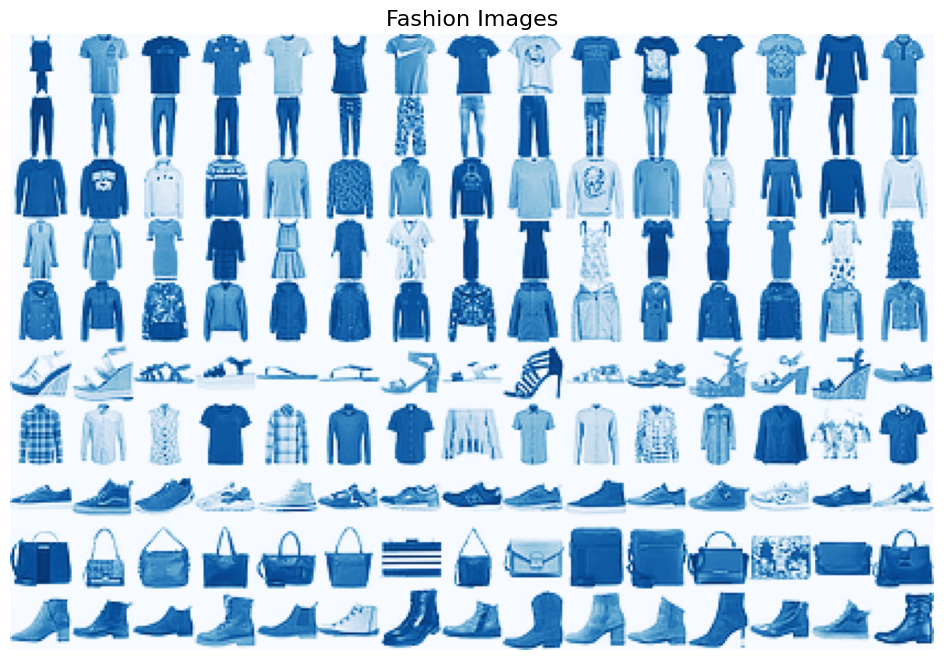

In [2]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [3]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_reg = LogisticRegression(
    max_iter=2000,
    tol=0.001,
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

f1

0.7381424298005053

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**ОТВЕТ:**

`f1_score` - это метрика классификации, которая объединяет точность (precision) и полноту (recall) в одно число, то есть является их средним.

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}
            {\text{Precision} + \text{Recall}},
$$

где:

**точность** — доля корректных предсказаний среди всех, отнесенных к положительному классу:
$$
\text{Precision} = \frac{TP}{TP + FP},
$$

$TP$ — число истинно положительных предсказаний, $FP$ — ложноположительных;

**полнота (recall)** — доля корректно предсказанных положительных примеров среди всех истинно положительных:
$$
\text{Recall} = \frac{TP}{TP + FN},
$$

$FN$ — ложноотрицательные.

К плюсам `f1-score` можно отнести то, что она учитывает и ложные срабатывания, и пропуски целевого класса; в сравнении с accuracy более информативна при дисбалансе классов; позволяет сравнивать модели на задачах, где важны и precision, и recall.

Минусы: мера учитывает только один класс (обычно положительный), игнорируя поведение модели на других; не показывает отдельно precision и recall.

**Параметр** `average='weighted'`:

При многоклассовой классификации вычисляется $F_1$ для каждого класса отдельно, а затем рассчитывается среднее значение, взвешенное по количеству истинных экземпляров каждого класса. Учитывается дисбаланс классов. Больший вес имеют те, у которых больше образцов. Этот параметр используется, когда классы несбалансированы и важно учесть размер каждого.

Существуют другие параметры average:

`average='macro'` — вычисляется простое среднее арифметическое $F_1$ по всем классам без учёта дисбаланса. Полезен, когда все классы равноценны по важности, но может завысить оценку при дисбалансе.

`average='micro'` — сначала глобально суммируются $TP, FP, FN$ по всем классам, а затем вычисляется общая precision и recall, на основе которых считается $F_1$. Фактически отражает общую эффективность модели без разделения на классы. При равных размерах классов micro и macro дают схожие результаты.

`average=None` — возвращает список $F_1 score$ для каждого класса в отдельности. Используется для детального анализа по каждому классу.

`average='binary'` — используется по умолчанию для бинарной классификации, рассчитывает $F_1$ только для положительного класса.


Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

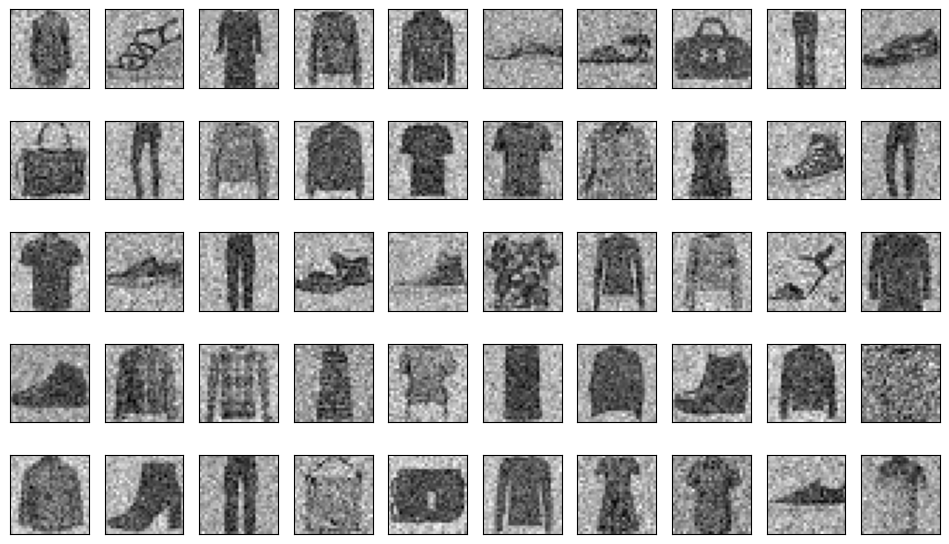

In [6]:
scale = 50
X_test_noisy = np.random.normal(X_test, scale)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:** чем выше `scale` в  `np.random.normal(X_test, scale)`, тем более непонятными становятся изображения


Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [7]:
from sklearn.metrics import f1_score

y_pred_noisy = log_reg.predict(X_test_noisy)

f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
f1_noisy

0.5402502782253921

**Ваши выводы:** ээээ... при высоком шуме объекты сложнее классифицировать, они становятся неразличимыми

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

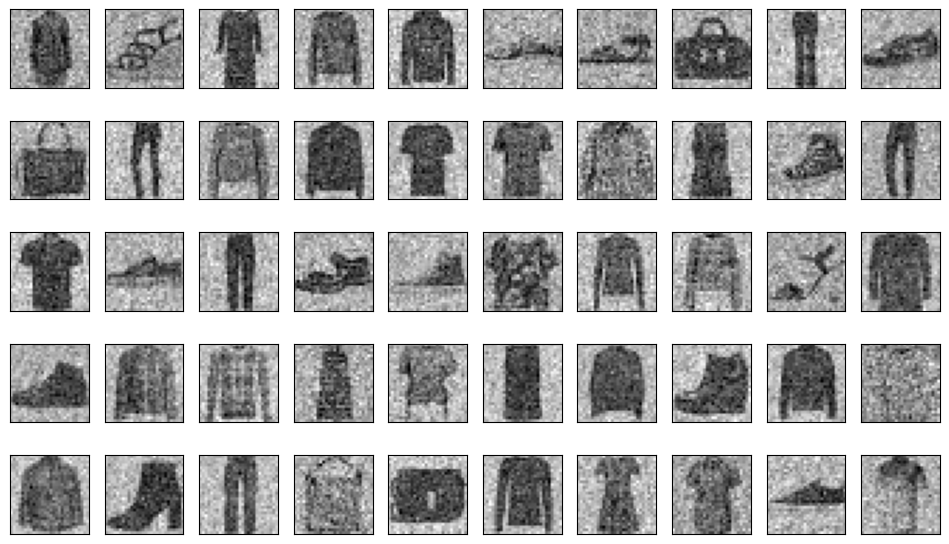

In [8]:
from sklearn.decomposition import PCA

explained_variance = 0.9

pca = PCA(n_components=explained_variance)
X_test_noisy_reduced = pca.fit_transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(X_test_noisy_reduced)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

Чем ниже значеник параметра `explained_variance`, тем сильнее сглаживание и меньше шум на восстановленных изображениях.
Чем выше значение параметра, тем лучше модель сохраняет дисперсию исходных данных и тем более восстановленные изображения похожи на исходные (в том числе силой зашумленности).

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [9]:
y_pred_restored = log_reg.predict(restored_X_test_noisy)

f1_restored = f1_score(y_test, y_pred_restored, average='weighted')
print("Weighted F1 on denoised test:", f1_restored)

Weighted F1 on denoised test: 0.575421761612935


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

**Ваши выводы:** `f1_score` увеличился с `PCA`, значит, видимо, шум стал меньше.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Градиент для SNE:**

$$ C = \mathbb{KL}(P \parallel Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

Здесь $q_{ij} = \frac{\exp(-\|y_i - y_j\|^2)}{\sum_{k \neq l} \exp(-\|y_k - y_l\|^2)}$.

Градиент по $y_i$: $$\frac{\partial C}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij})(y_i - y_j)$$

**Градиент для t-SNE**

В t-SNE распределение $Q$ задаётся $t$-распределением: $$q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}$$

Градиент по $y_i$: $$\frac{\partial C}{\partial y_i} = 4 \sum_{j} (p_{ij} - q_{ij})(y_i - y_j)(1 + \|y_i - y_j\|^2)^{-1}$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [10]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

In [11]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import time

In [12]:
X = data.values.astype(float)   # (n, d)
n, d = X.shape

In [14]:
# матрица расстояний
def compute_squared_distances(Y):
    sum_Y = np.sum(Y**2, axis=1)
    D = sum_Y[:, None] + sum_Y[None, :] - 2 * Y @ Y.T
    D = np.maximum(D, 0.0)
    return D

In [15]:
# матрица P
def build_P_knn(X, k):
    n = X.shape[0]
    D = compute_squared_distances(X)
    np.fill_diagonal(D, np.inf)

    P_cond = np.zeros((n, n), dtype=float)

    for j in range(n):
        nn_idx = np.argsort(D[:, j])[:k]
        P_cond[nn_idx, j] = 1.0 / k

    P = (P_cond + P_cond.T) / (2.0 * n)
    np.fill_diagonal(P, 0.0)

    P /= P.sum()
    return P

In [16]:
# sne
def sne_loss_and_grad(ylat, P):
    n = P.shape[0]
    Y = ylat.reshape(n, 2)

    D = compute_squared_distances(Y)
    np.fill_diagonal(D, 0.0)

    F = np.exp(-D)
    np.fill_diagonal(F, 0.0)
    Z = F.sum()
    Q = F / Z

    eps = 1e-12
    C = np.sum(P * np.log((P + eps) / (Q + eps)))

    PQ = P - Q
    diff = Y[:, None, :] - Y[None, :, :]
    grad = 4.0 * np.sum(PQ[:, :, None] * diff, axis=1)

    return C, grad.ravel()

In [17]:
# t-sne
def tsne_loss_and_grad(ylat, P):
    n = P.shape[0]
    Y = ylat.reshape(n, 2)

    D = compute_squared_distances(Y)
    np.fill_diagonal(D, 0.0)

    F = 1.0 / (1.0 + D)
    np.fill_diagonal(F, 0.0)
    Z = F.sum()
    Q = F / Z

    eps = 1e-12
    C = np.sum(P * np.log((P + eps) / (Q + eps)))

    PQ = P - Q
    diff = Y[:, None, :] - Y[None, :, :]
    W = PQ * F
    grad = 4.0 * np.sum(W[:, :, None] * diff, axis=1)

    return C, grad.ravel()

In [20]:
k = 10
P = build_P_knn(X, k)

rng = np.random.default_rng(42)
Y0 = rng.normal(scale=1e-4, size=(n, 2))

Text(0.5, 1.0, 't-SNE, k=10')

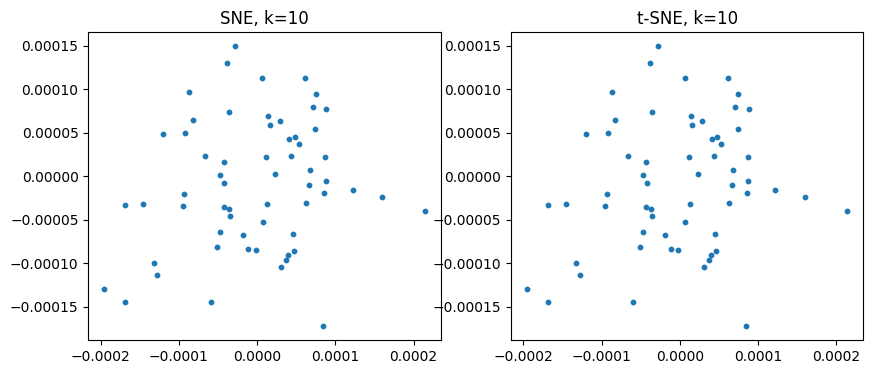

In [21]:
res_sne = minimize(
    fun=lambda y: sne_loss_and_grad(y, P),
    x0=Y0.ravel(),
    jac=True
)
Y_sne = res_sne.x.reshape(n, 2)

res_tsne = minimize(
    fun=lambda y: tsne_loss_and_grad(y, P),
    x0=Y0.ravel(),
    jac=True
)
Y_tsne = res_tsne.x.reshape(n, 2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(Y_sne[:, 0], Y_sne[:, 1], s=10)
axes[0].set_title(f"SNE, k={k}")

axes[1].scatter(Y_tsne[:, 0], Y_tsne[:, 1], s=10)
axes[1].set_title(f"t-SNE, k={k}")

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [22]:
from sklearn.manifold import TSNE

perplexity= 5, time=0.91 s
perplexity=20, time=1.64 s
perplexity=50, time=1.07 s


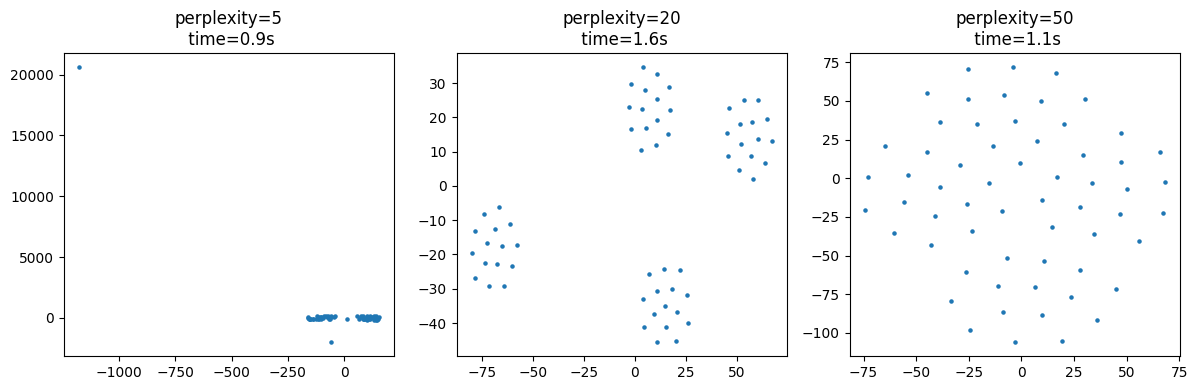

early_exaggeration= 4.0, time=1.48 s
early_exaggeration=12.0, time=1.21 s
early_exaggeration=30.0, time=0.82 s


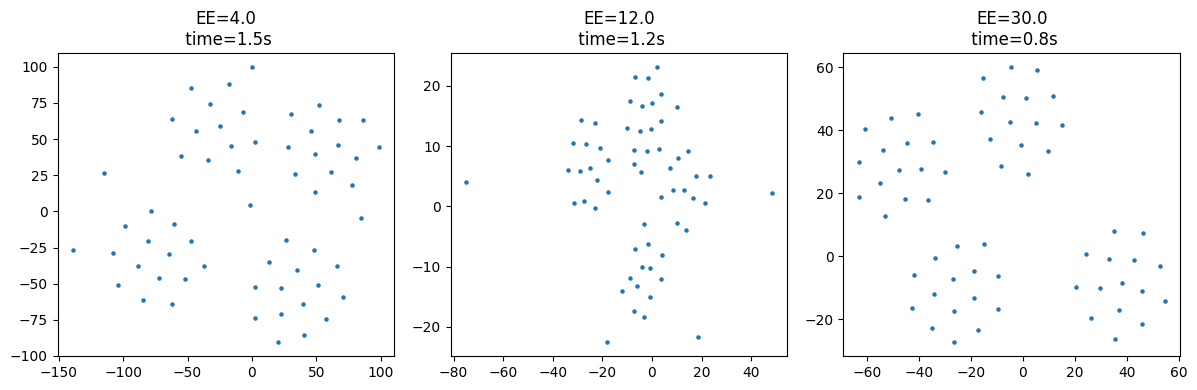

init=random, time=0.80 s
init=pca, time=0.90 s


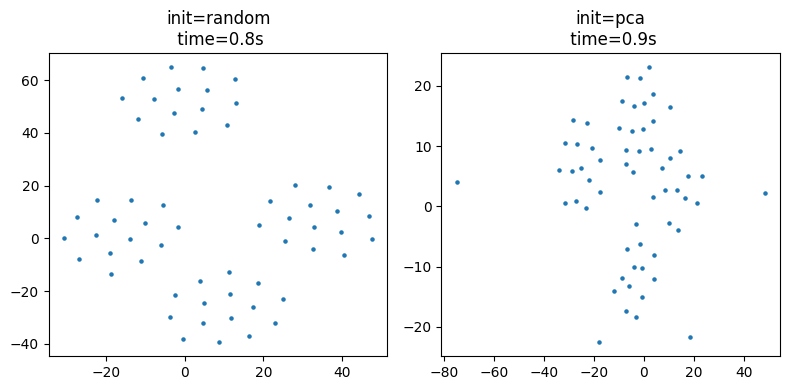

In [23]:
X = data.values.astype(float)
n, d = X.shape

def run_tsne(X, perplexity=30, early_exaggeration=12.0, init="pca", random_state=42, learning_rate=200.0):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        init=init,
        learning_rate=learning_rate,
        random_state=random_state,
    )
    t0 = time.time()
    Y = tsne.fit_transform(X)
    return Y, time.time() - t0


perplexities = [5, 20, 50]
emb_perp = []
for perp in perplexities:
    Y, t_run = run_tsne(X, perplexity=perp)
    emb_perp.append((perp, Y, t_run))
    print(f"perplexity={perp:>2}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(perplexities), figsize=(4 * len(perplexities), 4))
for ax, (perp, Y, t_run) in zip(axes, emb_perp):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"perplexity={perp}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()


ees = [4.0, 12.0, 30.0]
emb_ee = []
for ee in ees:
    Y, t_run = run_tsne(X, perplexity=30, early_exaggeration=ee)
    emb_ee.append((ee, Y, t_run))
    print(f"early_exaggeration={ee:>4}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(ees), figsize=(4 * len(ees), 4))
for ax, (ee, Y, t_run) in zip(axes, emb_ee):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"EE={ee}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()


inits = ["random", "pca"]
emb_init = []
for init in inits:
    Y, t_run = run_tsne(X, perplexity=30, init=init)
    emb_init.append((init, Y, t_run))
    print(f"init={init}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(inits), figsize=(4 * len(inits), 4))
for ax, (init, Y, t_run) in zip(axes, emb_init):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"init={init}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [25]:
from sklearn.datasets import load_digits

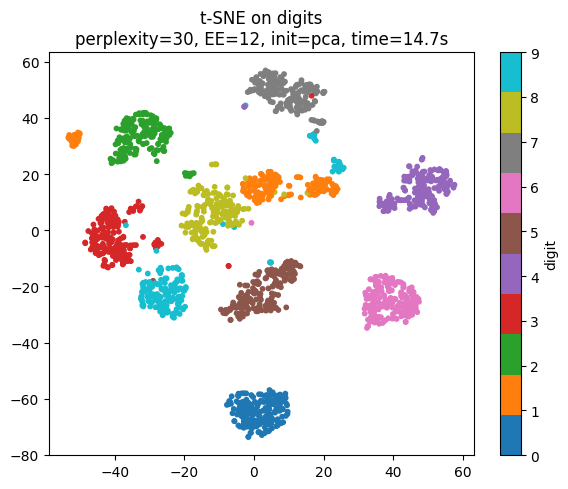

In [26]:
digits = load_digits()
X = digits.data
y = digits.target

def run_tsne(X, perplexity=30, early_exaggeration=10.0,
             init="pca", learning_rate=200.0,
             random_state=42):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        init=init,
        learning_rate=learning_rate,
        random_state=random_state,
    )
    t0 = time.time()
    Y = tsne.fit_transform(X)
    return Y, time.time() - t0

Y_tsne, t_run = run_tsne(X)

plt.figure(figsize=(6, 5))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=y, s=10, cmap="tab10")
plt.colorbar(label="digit")
plt.title(f"t-SNE on digits\nperplexity=30, EE=12, init=pca, time={t_run:.1f}s")
plt.tight_layout()
plt.show()